### **Notebook for cleaning velocity data**
#### Author: Hannah Nevel

##### Data needs to be in the following format to run this program:
- csv or xlsx file
- column names above each set of values
- file located on local device

##### Import necessary libraries and data

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


##### Define needed variables

In [225]:
#Change all backslashes in file path to double back slashes
file_location = "C:\\Users\\HannahNevel\\OneDrive - STF Technologies LLC\\Desktop\DOE RheoSurfR\\Motor Data\dilation_1.5_05_15_2023.csv"

#input the path you want the new file saved at
basepath = 'C:\\Users\\HannahNevel\\OneDrive - STF Technologies LLC\\Desktop\DOE RheoSurfR\\'

#assign a new filename for the cleaned data
newfile = 'velocity_dilation_1.5_05_15_2023_cleaned.csv'

#input velocity threshold value, all data values below this point will be removed
velocity_threshold_low = 1.2

#input velocity threshold value, all data values above this point will be removed
velocity_threshold_high = 1.8

#assign as a string the name of the first data column
first_col = 'Motor 1 Arm Velocity (mm/min)'

#assign as a string the name of the time column
time_col = 'Time (ms)'



##### Define function to open and import csv or xlsx file, create data frame, and drop missing/null values

In [226]:
def import_csv_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_csv(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

def import_xlsx_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_excel(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

## Change functions depending on the file type
imported_vel_data = import_csv_file(file_location)

#### Clean Data

##### Define function to shift time points to the first velocity value above given threshold 

In [227]:
def shift_time_col(imported_data_frame, vel_thresh_low, vel_col_name, time_col_name):
    index_list = imported_data_frame[imported_data_frame[vel_col_name] < vel_thresh_low].index
    time_value = imported_data_frame[time_col_name][len(index_list)-1]

    for item in imported_data_frame[time_col_name]:
        imported_data_frame[time_col_name] = imported_data_frame[time_col_name].replace(item, item-time_value)
   
#uncomment the below line if you want to shift the time points of the data  
#shift_time_col(imported_vel_data, velocity_threshold_low, first_col, time_col)
    

##### Define function to remove data points where velocity is less than defined threshold and remove data points where time is 0

In [228]:
def remove_vals(imported_data_frame, vel_thresh_low, vel_thresh_high, first_column, time_column):
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[first_column] < vel_thresh_low].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[first_column] > vel_thresh_high].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[time_column] == 0].index, inplace=True)
    return formatted

##### Run data through cleaning functions, change time column from ms to min, and print

In [229]:

remove_vals(imported_vel_data, velocity_threshold_low, velocity_threshold_high, first_col, time_col)


imported_vel_data.rename(columns = {'Time (ms)':'Time (min)'}, inplace = True)
imported_vel_data['Time (min)'] = imported_vel_data['Time (min)'].div(60000)
print(imported_vel_data)



       Motor 1 Arm Velocity (mm/min)  Motor 2 Arm Velocity (mm/min)  \
990                            1.327                          1.333   
991                            1.327                          1.333   
992                            1.327                          1.333   
993                            1.615                          1.474   
994                            1.615                          1.474   
...                              ...                            ...   
92505                          1.477                          1.460   
92506                          1.477                          1.460   
92507                          1.468                          1.534   
92508                          1.628                          1.495   
92509                          1.282                          1.502   

       Time (min)  Target Velocity (mm/min)  Difference in motor position (mm)  
990      0.347283                       1.0                       

#### Data Visualization

Motor 1 Arm Velocity (mm/min)        1.504656
Motor 2 Arm Velocity (mm/min)        1.497449
Time (min)                           0.687980
Target Velocity (mm/min)             1.000000
Difference in motor position (mm)    0.003000
dtype: float64

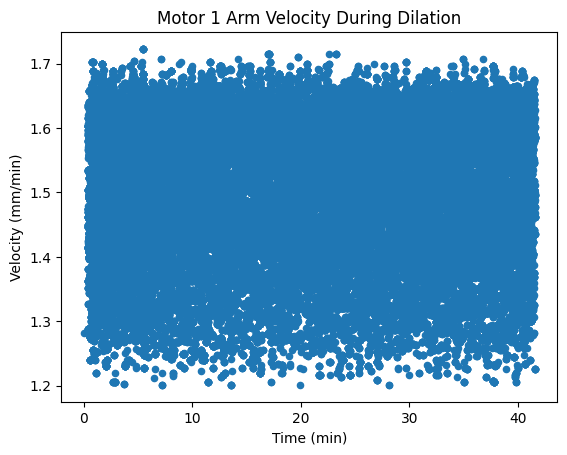

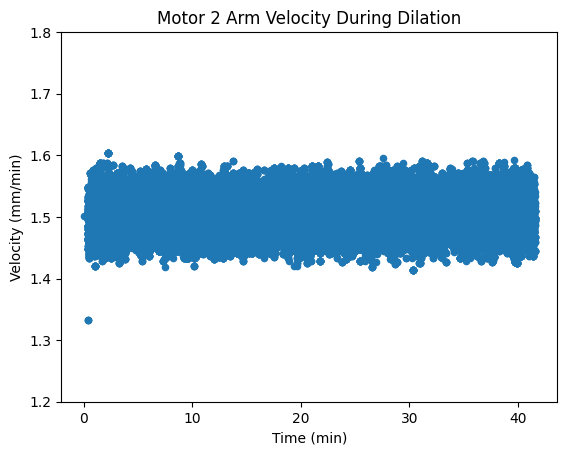

In [230]:
graph1 = imported_vel_data.iloc[:].plot(x='Time (min)', y='Motor 1 Arm Velocity (mm/min)', kind='scatter', title = 'Motor 1 Arm Velocity During Dilation')
graph2 = imported_vel_data.iloc[:].plot(x='Time (min)', y='Motor 2 Arm Velocity (mm/min)', kind='scatter', title = 'Motor 2 Arm Velocity During Dilation', ylim = (velocity_threshold_low,velocity_threshold_high))
graph1.set_ylabel('Velocity (mm/min)')
graph2.set_ylabel('Velocity (mm/min)')
imported_vel_data.iloc[215:2300].mean()

##### Save cleaned data to csv file, uncomment after checking data output

In [231]:
newfile_path = basepath + newfile
imported_vel_data.to_csv(newfile_path, index = False)